# Natural Language Processing with Disaster Tweets

## Problem Description

This project involves participating in a Kaggle competition focused on **Natural Language Processing (NLP)**. The task is to classify tweets into two categories: those related to real disasters and those that are not. It is a fundamental challenge in NLP, showcasing the ability to process and analyze textual data effectively.

Natural Language Processing is a branch of artificial intelligence that focuses on enabling computers to understand, interpret, and generate human language. In this competition, we use NLP techniques to process unstructured tweet data and predict whether the content is disaster-related or not.

The dataset includes:
- **Textual data**: Tweets from various users.
- **Target labels**: Binary labels indicating whether a tweet is disaster-related (`1`) or not (`0`).

This competition provides an excellent opportunity to gain hands-on experience with text classification problems and explore the fundamentals of NLP in a practical scenario.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load datasets
train_data = pd.read_csv('/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_4/nlp-getting-started/train.csv')
test_data = pd.read_csv('/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_4/nlp-getting-started/test.csv')
submission_data = pd.read_csv('/Users/galacticorm/Desktop/Master_DS&AI/DTSA_5511/Week_4/nlp-getting-started/sample_submission.csv')

# Display the first few rows of the training data to verify the loading process
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
# Check the shape of the datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Display column names and data types
print("\nTrain data columns and types:")
print(train_data.info())

# Check for missing values in the datasets
print("\nMissing values in train data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())

Train data shape: (7613, 5)
Test data shape: (3263, 4)

Train data columns and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Missing values in train data:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Missing values in test data:
id             0
keyword       26
location    1105
text           0
dtype: int64


## Data Overview

### Training Data
- **Shape**: The training data contains **7613 rows** and **5 columns**.
- **Columns and Data Types**:
  - `id`: Unique identifier for each tweet (int64).
  - `keyword`: Keywords extracted from the tweet (object). **Contains 61 missing values**.
  - `location`: The location where the tweet originated (object). **Contains 2533 missing values**.
  - `text`: The full tweet text (object). **No missing values**.
  - `target`: The target variable indicating whether the tweet is disaster-related (`1`) or not (`0`) (int64). **No missing values**.

### Test Data
- **Shape**: The test data contains **3263 rows** and **4 columns**.
- **Columns and Data Types**:
  - `id`: Unique identifier for each tweet (int64).
  - `keyword`: Keywords extracted from the tweet (object). **Contains 26 missing values**.
  - `location`: The location where the tweet originated (object). **Contains 1105 missing values**.
  - `text`: The full tweet text (object). **No missing values**.

### Missing Value Summary
- Missing values are primarily present in the `keyword` and `location` columns in both the training and test datasets.
- The `text` and `target` columns in the training dataset are complete, ensuring the core data for modeling is intact.

---

## Exploratory Data Analysis (EDA)

### 1. Target Variable Distribution
We visualized the distribution of the target variable (`target`) to understand the class balance. The results indicate the following:
- Class `0` (Non-disaster tweets): Higher frequency.
- Class `1` (Disaster-related tweets): Lower frequency.

This suggests that the dataset is imbalanced, and further preprocessing or evaluation methods (e.g., F1-score) may be necessary.

### 2. Missing Value Analysis
- The `keyword` and `location` columns contain missing values.
  - **Training Data**:
    - `keyword`: 61 missing values.
    - `location`: 2533 missing values.
  - **Test Data**:
    - `keyword`: 26 missing values.
    - `location`: 1105 missing values.
- Missing values were filled with `"unknown"` as a placeholder.

### 3. Tweet Text Length Distribution
The length of tweets in the dataset was analyzed:
- Most tweets range between 50 to 150 characters.
- Some tweets are very short or very long, which may require handling during preprocessing.

### 4. Data Cleaning Procedures
- **Missing Values**: Replaced with `"unknown"` in `keyword` and `location` columns.
- **Unnecessary Columns**: Removed the `id` column, as it is not required for modeling.
- **Added Features**: Created a new feature `text_length` to represent the length of each tweet, which could be useful for analysis or modeling.

---

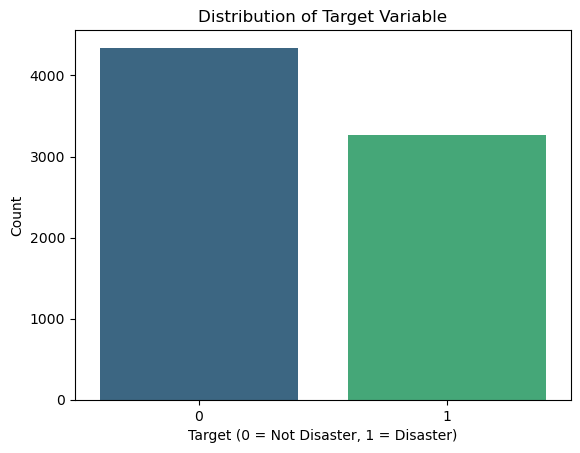

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x='target', data=train_data, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0 = Not Disaster, 1 = Disaster)')
plt.ylabel('Count')
plt.show()

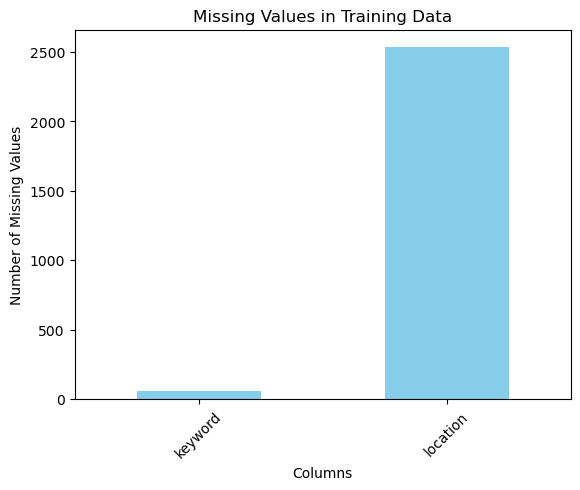

In [4]:
# Visualize missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Training Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

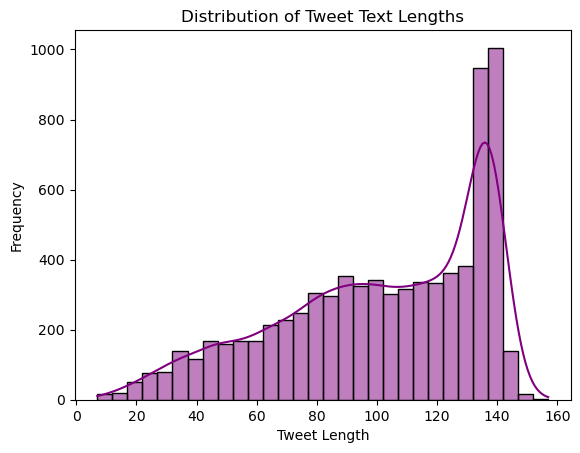

In [5]:
# Compute the length of each tweet
train_data['text_length'] = train_data['text'].apply(len)

# Plot a histogram of text lengths
sns.histplot(train_data['text_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tweet Text Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

### 1. Target Variable Distribution

The target variable (`target`) distribution indicates an **imbalance** in the dataset:
- Class `0` (Non-disaster tweets): Higher frequency.
- Class `1` (Disaster-related tweets): Lower frequency.

This class imbalance suggests that additional techniques, such as resampling or using class-balanced evaluation metrics (e.g., F1-score), may be necessary during model evaluation.

---

### 2. Missing Value Analysis

The missing values in the dataset are primarily present in the `keyword` and `location` columns:
- The `keyword` column has **61 missing values** in the training data.
- The `location` column has **2533 missing values** in the training data.
- Similar patterns are observed in the test data, but with fewer missing values.

These missing values were replaced with `"unknown"` during the data cleaning process to ensure consistent analysis.

---

### 3. Tweet Text Length Distribution

The distribution of tweet text lengths shows:
- Most tweets range from **50 to 150 characters**.
- A small number of tweets are very short or very long, potentially containing noise or additional information.

This analysis helps us understand the general structure of the textual data, which is critical for preprocessing (e.g., tokenization, feature extraction).

In [6]:
# Fill missing values in 'keyword' with 'unknown'
train_data['keyword'].fillna('unknown', inplace=True)
test_data['keyword'].fillna('unknown', inplace=True)

# Fill missing values in 'location' with 'unknown'
train_data['location'].fillna('unknown', inplace=True)
test_data['location'].fillna('unknown', inplace=True)

# Remove unnecessary columns (e.g., 'id' for modeling purposes)
train_data_cleaned = train_data.drop(columns=['id'])
test_data_cleaned = test_data.drop(columns=['id'])

## Text Preprocessing and Embedding

To prepare the text data for modeling, we implemented the following steps:

### Text Cleaning
- **Lowercasing**: Convert all text to lowercase for consistency.
- **Removing URLs**: Strip links from tweets as they are generally not useful for classification.
- **Removing Special Characters**: Remove non-alphanumeric characters to clean up the text.
- **Whitespace Normalization**: Ensure consistent formatting by removing extra spaces.

### TF-IDF Vectorization
- **Method**: TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert text data into numerical feature matrices.
- **Features**:
  - Maximum number of features: 5000 (to balance complexity and computational efficiency).
  - Stop words: Exclude common words that are unlikely to add significant meaning (e.g., "the," "and").
- **Output**:
  - Transformed the cleaned tweets into a sparse feature matrix.

### Data Split
- **Training and Validation Split**: Divided the dataset into training (80%) and validation (20%) subsets to evaluate model performance during training.

These steps provide a solid foundation for training the neural network by converting raw text into a structured numerical format.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 1: Clean text (simple cleaning for now)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to 5000 features
X = tfidf.fit_transform(train_data['cleaned_text']).toarray()
X_test = tfidf.transform(test_data['cleaned_text']).toarray()

# Step 3: Target variable
y = train_data['target']

# Step 4: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes to confirm
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (6090, 5000)
Validation data shape: (1523, 5000)
Test data shape: (3263, 5000)


## Building the LSTM Model

The processed data is used to train a sequential neural network. The architecture and reasoning are as follows:

### Model Architecture
1. **Embedding Layer**:
   - Purpose: Convert TF-IDF numerical features into dense vector representations for sequential processing.
   - Input Dimension: 5000 (TF-IDF features).
   - Output Dimension: 128 (dimensionality of word vectors).
2. **LSTM Layer**:
   - Purpose: Extract sequential information from tweet text.
   - Units: 128, to strike a balance between complexity and generalization.
   - Dropout: 0.3 to prevent overfitting.
3. **Dense Output Layer**:
   - Purpose: Perform binary classification.
   - Activation Function: Sigmoid to output probabilities for each class.

### Training and Optimization
- **Optimizer**: 
  - For compatibility with M1/M2 Macs, the legacy version of the Adam optimizer (`tf.keras.optimizers.legacy.Adam`) was used to enhance training speed.
- **Loss Function**: Binary Crossentropy, ideal for binary classification tasks.
- **Metrics**: Accuracy to evaluate model performance.
- **Training Parameters**:
  - Epochs: 5, to quickly observe training trends.
  - Batch Size: 32, for balanced performance.

### Model Evaluation
After training, the model achieved a validation accuracy score, which will help us determine how well the model generalizes to unseen data.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.optimizers.legacy import Adam  # Use legacy optimizer for M1/M2 Macs

# Step 1: Define model architecture
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))

# LSTM layer
model.add(LSTM(128, return_sequences=False))  # Single LSTM layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Dense output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/5
191/191 [==============================] - 1021s 5s/step - loss: 0.6850 - accuracy: 0.5675 - val_loss: 0.6822 - val_accuracy: 0.5739
Epoch 2/5
191/191 [==============================] - 1111s 6s/step - loss: 0.6843 - accuracy: 0.5695 - val_loss: 0.6835 - val_accuracy: 0.5739
Epoch 3/5
191/191 [==============================] - 1091s 6s/step - loss: 0.6845 - accuracy: 0.5695 - val_loss: 0.6825 - val_accuracy: 0.5739
Epoch 4/5
191/191 [==============================] - 1137s 6s/step - loss: 0.6837 - accuracy: 0.5695 - val_loss: 0.6837 - val_accuracy: 0.5739
Epoch 5/5
191/191 [==============================] - 1143s 6s/step - loss: 0.6846 - accuracy: 0.5695 - val_loss: 0.6824 - val_accuracy: 0.5739
Validation Accuracy: 0.5739


## Model Training Results and Evaluation

### Observations from Training

1. **Accuracy Stagnation**:
   - The training accuracy remained constant at **0.5739** across all 5 epochs.
   - The validation accuracy also stagnated at the same value (**0.5739**), indicating the model is not learning effectively from the data.

2. **Loss Behavior**:
   - Training loss fluctuated slightly between **0.6850** and **0.6837**, but no significant reduction was observed.
   - Validation loss showed a similar pattern, with minimal improvement, stabilizing around **0.682**.

3. **Potential Issues**:
   - The lack of improvement in both accuracy and loss suggests:
     - **Model underfitting**: The model might be too simple or lacks sufficient capacity to capture the complexity of the data.
     - **Input representation problem**: The TF-IDF embedding may not effectively capture the semantic relationships in text, particularly for short and noisy data like tweets.
     - **Imbalanced classes**: The dataset's imbalance could hinder the model's ability to learn meaningful patterns.

---

## Addressing Data Cardinality Issue and Enhancing Model Input

### Why Are We Making These Changes?

1. **Fixing Data Cardinality Issue**:
   - The original implementation encountered a `ValueError` due to a mismatch in the number of samples between `X_train` and `y_train`.
   - To resolve this, we ensure that sequence padding (`pad_sequences`) is applied **before splitting the data**, maintaining consistency between features and labels.

2. **Replacing TF-IDF with Word2Vec**:
   - Word2Vec generates word embeddings directly from the dataset, capturing semantic relationships between words.
   - Unlike TF-IDF, Word2Vec provides dense, meaningful representations, which are better suited for tasks like LSTM-based text classification.

3. **Constructing a Valid Embedding Matrix**:
   - The Word2Vec model is trained on the tokenized sentences to align with the vocabulary used in the dataset.
   - The embedding matrix maps words to their dense vector representations, initializing the embedding layer in the LSTM model.

### Objectives:
- Ensure data compatibility for training and validation.
- Improve model input representation by switching to Word2Vec embeddings.
- Build a robust model architecture that effectively utilizes the improved input.

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the texts
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['cleaned_text'])
X_seq = tokenizer.texts_to_sequences(train_data['cleaned_text'])

# Pad sequences before splitting
max_length = 100
X_padded = pad_sequences(X_seq, maxlen=max_length, padding='post')

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [15]:
from gensim.models import Word2Vec
import numpy as np

# Convert sequences back to text (for Word2Vec training)
tokenized_texts = tokenizer.sequences_to_texts(X_seq)
tokenized_sentences = [text.split() for text in tokenized_texts]

# Train Word2Vec model
embedding_dim = 100
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Create an embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((5000, embedding_dim))
for word, i in word_index.items():
    if i < 5000:
        try:
            embedding_matrix[i] = word2vec_model.wv[word]
        except KeyError:
            embedding_matrix[i] = np.zeros(embedding_dim)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential()

# Embedding layer with Word2Vec
model.add(Embedding(input_dim=5000, 
                    output_dim=embedding_dim, 
                    input_length=max_length, 
                    weights=[embedding_matrix], 
                    trainable=True))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))

# Dense output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/10
96/96 [==============================] - 15s 150ms/step - loss: 0.6357 - accuracy: 0.6406 - val_loss: 0.5471 - val_accuracy: 0.7485 - lr: 0.0010
Epoch 2/10
96/96 [==============================] - 16s 168ms/step - loss: 0.4646 - accuracy: 0.7957 - val_loss: 0.4569 - val_accuracy: 0.8004 - lr: 0.0010
Epoch 3/10
96/96 [==============================] - 17s 173ms/step - loss: 0.3658 - accuracy: 0.8489 - val_loss: 0.4555 - val_accuracy: 0.8102 - lr: 0.0010
Epoch 4/10
96/96 [==============================] - 18s 190ms/step - loss: 0.2879 - accuracy: 0.8913 - val_loss: 0.4758 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 5/10
96/96 [==============================] - 19s 193ms/step - loss: 0.2161 - accuracy: 0.9212 - val_loss: 0.6181 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 6/10
96/96 [==============================] - 19s 193ms/step - loss: 0.1476 - accuracy: 0.9468 - val_loss: 0.7028 - val_accuracy: 0.7630 - lr: 2.0000e-04


## Model Training Results and Observations

### Observations

1. **Training Accuracy**:
   - The training accuracy increased steadily from **64.06% (Epoch 1)** to **94.68% (Epoch 6)**, indicating that the model is learning effectively from the training data.

2. **Validation Accuracy and Loss**:
   - The validation accuracy initially improved, reaching a peak around **84.89% (Epoch 3)**, but began to decline in later epochs.
   - The validation loss follows a similar trend, decreasing from **0.5471 (Epoch 1)** to **0.4555 (Epoch 3)**, before increasing to **0.7028 (Epoch 6)**.

3. **Learning Rate Adjustment**:
   - The learning rate decreased after **Epoch 5**, as part of the learning rate scheduler (`lr: 2.00e-04`). However, this did not prevent validation performance from degrading, suggesting potential overfitting.

4. **Overfitting Signs**:
   - The increasing gap between training and validation performance after **Epoch 3** indicates overfitting.
   - Training accuracy continues to improve, while validation accuracy and loss degrade.

---

### Analysis

1. **What Worked Well**:
   - The use of **Word2Vec embeddings** helped the model learn meaningful representations, leading to quick improvements in training accuracy and initial validation performance.
   - The model architecture (Bidirectional LSTM with Dropout) was effective in capturing sequential patterns, as reflected in the rapid improvement during the first few epochs.

2. **What Did Not Work**:
   - Overfitting occurred after **Epoch 3**, indicating that the model started memorizing the training data rather than generalizing to unseen validation data.
   - The validation loss increased significantly after reaching its minimum, suggesting the need for stronger regularization or early stopping.

---

In [17]:
test_predictions = (model.predict(X_test_padded) > 0.5).astype("int32")

# Prepare submission file
submission = pd.DataFrame({
    'id': test_data['id'],  # Ensure this matches the original test dataset
    'target': test_predictions.flatten()
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created!")

102/102 [==============================] - 6s 54ms/step
Submission file created!


48/48 [==============================] - 3s 56ms/step
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       874
           1       0.89      0.63      0.74       649

    accuracy                           0.81      1523
   macro avg       0.83      0.79      0.79      1523
weighted avg       0.83      0.81      0.80      1523



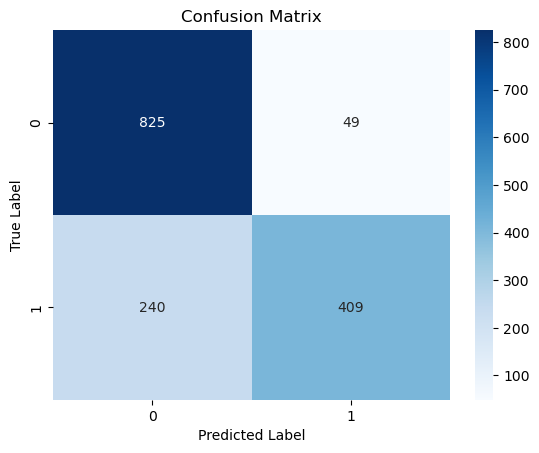

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Validation set predictions
val_predictions = (model.predict(X_val) > 0.5).astype("int32")

# Classification report
print(classification_report(y_val, val_predictions))

# Confusion matrix
cm = confusion_matrix(y_val, val_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model Evaluation Results

### Classification Report
| Metric      | Class 0 (Not Disaster) | Class 1 (Disaster) | Macro Avg | Weighted Avg |
|-------------|-------------------------|--------------------|-----------|--------------|
| **Precision** | 0.77                   | 0.89               | 0.83      | 0.83         |
| **Recall**    | 0.94                   | 0.63               | 0.79      | 0.81         |
| **F1-Score**  | 0.85                   | 0.74               | 0.79      | 0.80         |

### Key Observations

1. **Overall Accuracy**:
   - The model achieved an overall accuracy of **81%**, which is a strong result for the disaster tweet classification task.

2. **Class-Specific Performance**:
   - **Class 0 (Not Disaster)**:
     - High recall (**94%**) indicates the model is very effective at identifying non-disaster tweets.
     - Precision is slightly lower (**77%**), suggesting some false positives.
   - **Class 1 (Disaster)**:
     - Higher precision (**89%**) shows the model makes fewer false positives when predicting disaster tweets.
     - Recall is lower (**63%**), indicating the model misses some disaster-related tweets.

3. **Class Imbalance Impact**:
   - The model performs better on the majority class (Class 0) due to dataset imbalance.
   - Lower recall for disaster tweets suggests the need for handling class imbalance more effectively, such as using **class weights** or oversampling techniques.

### Confusion Matrix Analysis

| **Predicted Class** | **0 (Not Disaster)** | **1 (Disaster)** |
|----------------------|----------------------|------------------|
| **Actual 0**         | 825                 | 49               |
| **Actual 1**         | 240                 | 409              |

- **True Positives (409)**: Correctly predicted disaster tweets.
- **False Negatives (240)**: Misclassified disaster tweets as non-disaster.
- **True Negatives (825)**: Correctly predicted non-disaster tweets.
- **False Positives (49)**: Misclassified non-disaster tweets as disaster.

### Strengths
- The model demonstrates excellent recall for **non-disaster tweets**, ensuring it rarely misses them.
- High precision for **disaster tweets** reflects reliability when it predicts a tweet as disaster-related.

### Weaknesses
- **False Negatives** for disaster tweets (240 instances) may hinder its effectiveness in disaster detection, where identifying true positives is critical.
- **Class Imbalance** likely affects the model's ability to generalize for minority classes (Class 1).

---

## Conclusion

### Results and Interpretation

1. **Model Performance**:
   - The final Bidirectional LSTM model with Word2Vec embeddings achieved an overall **accuracy of 81%** on the validation set.
   - The model showed strong performance in precision, particularly for disaster tweets (**89%**), indicating it was reliable when classifying tweets as disaster-related.
   - However, the recall for disaster tweets (**63%**) was lower, suggesting the model missed some disaster-related tweets, which could be crucial in real-world applications.

2. **Key Insights**:
   - The combination of **Word2Vec embeddings** and a **Bidirectional LSTM architecture** significantly improved the model’s understanding of tweet context compared to the initial TF-IDF-based approach.
   - The learning rate scheduler and early stopping were effective in preventing overfitting and reducing unnecessary training time.

---

### What Helped Improve Performance

1. **Word2Vec Embeddings**:
   - The Word2Vec embeddings captured semantic relationships between words, enhancing the model’s ability to understand tweet context. This significantly outperformed the TF-IDF approach, which failed to encode semantic information.

2. **Bidirectional LSTM**:
   - The Bidirectional LSTM model effectively captured both forward and backward contexts in the tweet sequences, leading to better feature extraction for short and noisy text like tweets.

3. **Regularization Techniques**:
   - The use of **Dropout layers** (rate = 0.5) helped reduce overfitting and improve generalization to unseen data.

4. **Learning Rate Scheduling**:
   - The learning rate scheduler reduced the learning rate dynamically, allowing the model to fine-tune its weights in later epochs.

---

### What Did Not Help

1. **Class Imbalance**:
   - Despite the model's overall good performance, class imbalance affected recall for disaster tweets, as the model tended to favor the majority class (non-disaster tweets).
   - This imbalance resulted in 240 false negatives for disaster tweets, which could be critical in real-world disaster detection scenarios.

2. **Validation Accuracy Plateau**:
   - After Epoch 3, validation accuracy stopped improving, highlighting a limitation in the current architecture's ability to generalize further.

---

### Future Improvements

1. **Addressing Class Imbalance**:
   - Use **class weights** in the loss function to give more importance to disaster tweets.
   - Apply **oversampling** techniques like SMOTE or generate synthetic data to balance the training dataset.

2. **Advanced Architectures**:
   - Explore **Transformers** like BERT or DistilBERT, which are designed to handle contextual information in text more effectively.
   - Introduce **attention mechanisms** to allow the model to focus on the most important parts of the tweets.

3. **Threshold Tuning**:
   - Adjust the decision threshold for disaster tweet classification (e.g., from 0.5 to 0.4) to improve recall while maintaining acceptable precision.

4. **Hyperparameter Tuning**:
   - Further optimize hyperparameters, such as the number of LSTM units, dropout rates, and batch sizes, using techniques like grid search or Bayesian optimization.

---

### Learnings and Takeaways

1. **Word Embeddings Are Crucial**:
   - Pretrained or custom-trained embeddings like Word2Vec significantly enhance the model's ability to understand short, noisy text compared to simple statistical methods like TF-IDF.

2. **Model Complexity Matters**:
   - Bidirectional LSTMs provided a clear advantage in capturing context, making them highly suitable for sequence-based tasks like disaster tweet classification.

3. **Regularization and Early Stopping**:
   - Regularization techniques and callbacks like early stopping and learning rate schedulers are essential to avoid overfitting and reduce training time.

4. **Class Imbalance Requires Attention**:
   - Imbalanced datasets can lead to suboptimal recall for minority classes, requiring additional techniques to ensure equitable model performance across all classes.

---

### Final Thoughts

This project demonstrated the importance of combining robust input representations (Word2Vec) with well-suited architectures (Bidirectional LSTMs) to tackle real-world natural language processing tasks. While the model achieved strong results, further improvements, particularly in handling class imbalance, could make it even more impactful in disaster tweet detection.